<a href="https://colab.research.google.com/github/BrouthenKamel/Machine_Learning_Project/blob/main/Heart_Attack_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing helpful python modules :***

**Numpy** : An optimized way of working with vectors, matrix

**Pandas** : Managing datasets

**Matplotlib** : Useful for data visualization

**Sklearn** : also named sci-kit learn, a library for multiple implemented ML algorithms, tools, metrics...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

**Importing the dataset**

In [2]:
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


**Categorical features**

In [4]:
chest_pain = { 1:'typical angina' , 2:'atypical angina' , 3:'non-anginal pain' , 4:'asymptomatic' }
ecg = { 0:'normal' , 1:'ST-T wave abnormality' , 2:'left ventricular hypertrophy' }
slope = { 1:'upsloping' , 2:'flat' , 3:'downsloping' }
dataset = dataset.replace( { "chest pain type" : chest_pain , "resting ecg" : ecg , "ST slope" : slope } )
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [5]:
dataset.rename( columns = { 'target' : 'heart attack' } , inplace= True )

**Exploring the dataset:**

Features, statistical information, data types...

In [6]:
dataset.describe()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,0.424884,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


**Data Cleaning Process:**

Missing values, wrong values...

In [7]:
dataset.rename( columns = { "resting bp s" : "resting bpm" } , inplace = True )
dataset.drop( dataset[ dataset["resting bpm"] == 0 ].index , inplace = True )
print("Resting Bpm corrected \n")
dataset["resting bpm"].sort_values()

Resting Bpm corrected 



315      80
228      92
834      94
694      94
1018     94
       ... 
242     200
734     200
366     200
1013    200
400     200
Name: resting bpm, Length: 1189, dtype: int64

**Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bdb6a0190>,
      dtype=object)

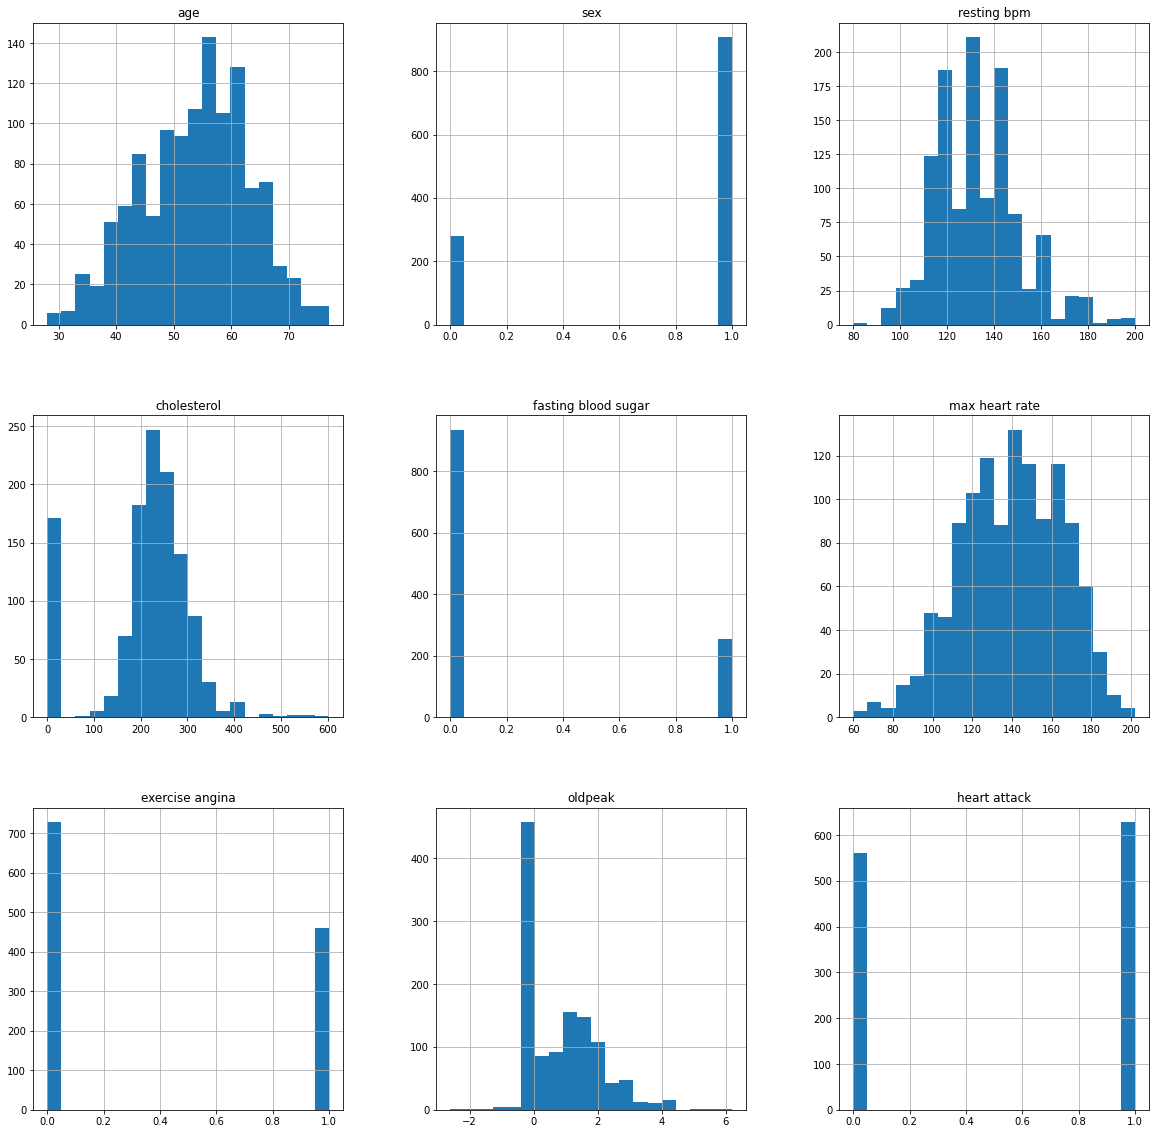

In [8]:
dataset.hist( bins = 20 , figsize = (20,20))

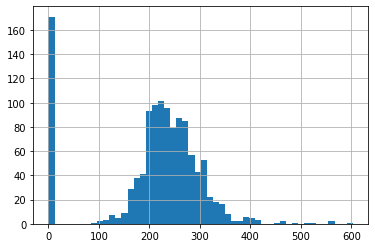

In [9]:
dataset["cholesterol"].hist(bins=50)

In [10]:
dataset.drop( dataset[ dataset['cholesterol'] == 0 ].index , inplace = True )

**Further exploration**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest pain type      1018 non-null   object 
 3   resting bpm          1018 non-null   int64  
 4   cholesterol          1018 non-null   int64  
 5   fasting blood sugar  1018 non-null   int64  
 6   resting ecg          1018 non-null   object 
 7   max heart rate       1018 non-null   int64  
 8   exercise angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST slope             1018 non-null   object 
 11  heart attack         1018 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 103.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bdaaba6d0>,
      dtype=object)

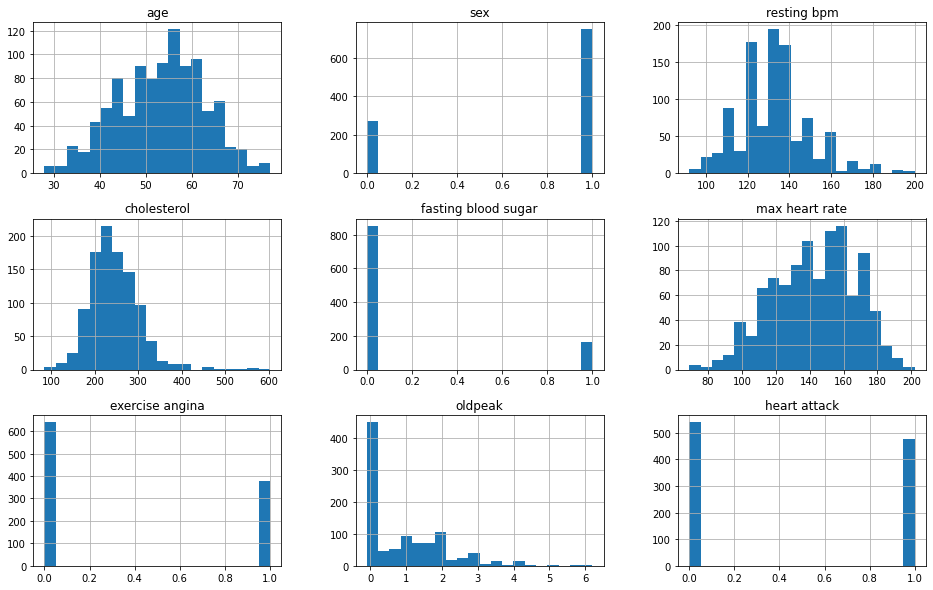

In [12]:
dataset.hist( bins = 20 , figsize=(16,10))

**Deviding Features** based on their type : **Categorical, Binary or Numerical**

In [13]:
categorical = ['chest pain type' , 'resting ecg' , 'ST slope']
binary = ['sex' , 'fasting blood sugar' , 'exercise angina' ]
numerical = ['age' , 'resting bpm' , 'cholesterol', 'max heart rate', 'oldpeak' ]

In [14]:
dataset.drop( dataset[ dataset['ST slope'] == 0 ].index , inplace = True )

In [15]:
dataset['ST slope'].unique()

array(['upsloping', 'flat', 'downsloping'], dtype=object)

In [16]:
dataset_original = dataset.copy()
dataset_original

,age,sex,chest pain type,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart attack
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


**Categorical data treatment**

In [17]:
dataset = pd.get_dummies( dataset , columns = categorical )

In [18]:
dataset

,age,sex,resting bpm,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,0,1,0,1,0
1186,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,0,1,0,1,0
1187,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,0,1,0,1,0
1188,57,0,130,236,0,174,0,0.0,1,0,1,0,0,0,1,0,0,1,0


**Examining correlations**

In [19]:
dataset.corr()['heart attack']

age                                         0.272956
sex                                         0.296183
resting bpm                                 0.170371
cholesterol                                 0.106846
fasting blood sugar                         0.113814
max heart rate                             -0.387527
exercise angina                             0.520392
oldpeak                                     0.471535
heart attack                                1.000000
chest pain type_asymptomatic                0.518146
chest pain type_atypical angina            -0.340507
chest pain type_non-anginal pain           -0.243567
chest pain type_typical angina             -0.070962
resting ecg_ST-T wave abnormality           0.089653
resting ecg_left ventricular hypertrophy    0.091801
resting ecg_normal                         -0.145507
ST slope_downsloping                        0.111616
ST slope_flat                               0.530037
ST slope_upsloping                         -0.

**Scaling the dataset**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform( dataset[numerical] )
scaled_features.shape

(1017, 5)

**Standardization**

In [22]:
for i,j in zip(numerical , range(scaled_features.shape[1] ) ):
  dataset[i] = scaled_features[:,j]
dataset

,age,sex,resting bpm,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,-1.412170,1,0.426854,0.752211,0,1.193765,0,-0.859912,0,0,1,0,0,0,0,1,0,0,1
1,-0.455144,0,1.573474,-1.152640,0,0.540957,0,0.054773,1,0,0,1,0,0,0,1,0,1,0
2,-1.731179,1,-0.146456,0.647357,0,-1.825470,0,-0.859912,0,0,1,0,0,1,0,0,0,0,1
3,-0.561480,0,0.312192,-0.558466,0,-1.417465,1,0.512116,1,1,0,0,0,0,0,1,0,1,0
4,0.076537,1,1.000164,-0.890505,0,-0.846259,0,-0.859912,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.880489,1,-1.293077,0.315319,0,-0.438254,0,0.237710,1,0,0,0,1,0,0,1,0,1,0
1186,1.565244,1,0.656178,-0.925456,1,-0.071050,0,2.250018,1,1,0,0,0,0,0,1,0,1,0
1187,0.395546,1,-0.146456,-2.008949,0,-1.131862,1,0.237710,1,1,0,0,0,0,0,1,0,1,0
1188,0.395546,0,-0.146456,-0.174001,0,1.275366,0,-0.859912,1,0,1,0,0,0,1,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bda4ea710>,
      dtype=object)

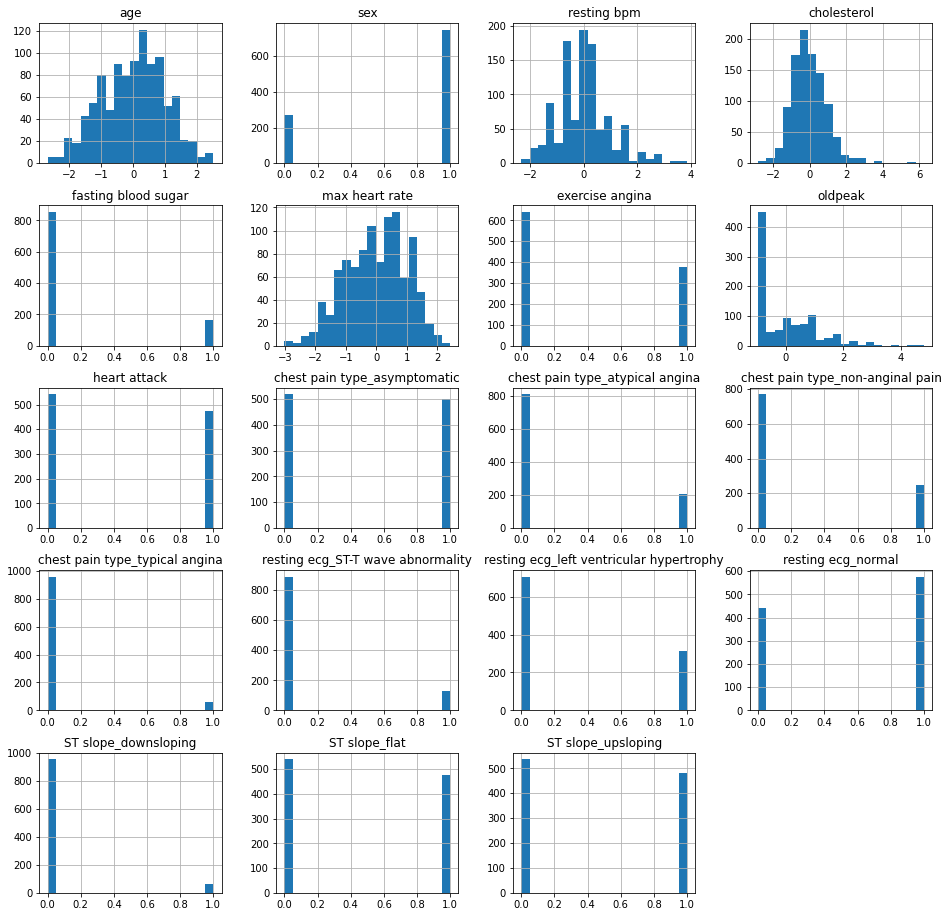

In [23]:
dataset.hist( bins = 20 , figsize=(16,16))

**Splitting the Dataset**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = dataset.drop( columns=['heart attack'] )
y = dataset['heart attack']

In [26]:
x

,age,sex,resting bpm,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,-1.412170,1,0.426854,0.752211,0,1.193765,0,-0.859912,0,1,0,0,0,0,1,0,0,1
1,-0.455144,0,1.573474,-1.152640,0,0.540957,0,0.054773,0,0,1,0,0,0,1,0,1,0
2,-1.731179,1,-0.146456,0.647357,0,-1.825470,0,-0.859912,0,1,0,0,1,0,0,0,0,1
3,-0.561480,0,0.312192,-0.558466,0,-1.417465,1,0.512116,1,0,0,0,0,0,1,0,1,0
4,0.076537,1,1.000164,-0.890505,0,-0.846259,0,-0.859912,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.880489,1,-1.293077,0.315319,0,-0.438254,0,0.237710,0,0,0,1,0,0,1,0,1,0
1186,1.565244,1,0.656178,-0.925456,1,-0.071050,0,2.250018,1,0,0,0,0,0,1,0,1,0
1187,0.395546,1,-0.146456,-2.008949,0,-1.131862,1,0.237710,1,0,0,0,0,0,1,0,1,0
1188,0.395546,0,-0.146456,-0.174001,0,1.275366,0,-0.859912,0,1,0,0,0,1,0,0,1,0


In [27]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: heart attack, Length: 1017, dtype: int64

In [28]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , stratify=y , random_state=42 )

**Data size limitations :**

In [29]:
x_train.shape

(813, 18)

In [30]:
x_test.shape

(204, 18)

**Logistic Regression Model Implementation**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.model_selection import GridSearchCV

**Instanciating a logistic regression model**

In [33]:
model = LogisticRegression()

**Grid Search Cross Validation Process**

In [34]:
grid= { "C": np.logspace(-2 , 2) , "solver" : [ "liblinear" , "saga" ] , "penalty":["l1","l2"] }
model_grid_cv = GridSearchCV( model , grid , cv=4 , scoring = 'accuracy' , return_train_score= True )

In [65]:
from warnings import filterwarnings
filterwarnings('ignore')
model_grid_cv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.947051...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [36]:
print(" Best model characteristics : ")
print(" Best estimator : ", model_grid_cv.best_estimator_ )
print(" Best score : ", model_grid_cv.best_score_ )
print(" Best params : ", model_grid_cv.best_params_ )

 Best model characteristics : 
 Best estimator :  LogisticRegression(C=2.329951810515372, solver='saga')
 Best score :  0.8486912006181783
 Best params :  {'C': 2.329951810515372, 'penalty': 'l2', 'solver': 'saga'}


In [37]:
for i,j in zip( model_grid_cv.cv_results_['mean_test_score'] , model_grid_cv.cv_results_['params'] ) :
  if( i>0.845 ):
    print(" The model scored : {} using the params : {} ".format(i,j) )
    print('----------------------------------------------------------------------------') 

 The model scored : 0.8462281464309861 using the params : {'C': 0.7543120063354615, 'penalty': 'l2', 'solver': 'saga'} 
----------------------------------------------------------------------------
 The model scored : 0.8462281464309861 using the params : {'C': 0.9102981779915218, 'penalty': 'l2', 'solver': 'saga'} 
----------------------------------------------------------------------------
 The model scored : 0.8462281464309861 using the params : {'C': 1.0985411419875584, 'penalty': 'l2', 'solver': 'saga'} 
----------------------------------------------------------------------------
 The model scored : 0.8474596735245823 using the params : {'C': 1.325711365590108, 'penalty': 'l1', 'solver': 'saga'} 
----------------------------------------------------------------------------
 The model scored : 0.8462281464309861 using the params : {'C': 1.325711365590108, 'penalty': 'l2', 'solver': 'liblinear'} 
----------------------------------------------------------------------------
 The model s

**Cross Validation Scoring**

In [38]:
from sklearn.model_selection import cross_val_score
logistic_classifier = model_grid_cv.best_estimator_
scores = cross_val_score(logistic_classifier , x_train , y_train , scoring='accuracy' , cv = 4 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [39]:
scores

array([0.8627451 , 0.85714286, 0.8226601 , 0.85221675])

**Time for Real Test**

In [40]:
y_predict = logistic_classifier.predict(x_test)

**Measuring a model's performance**

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy = accuracy_score( y_test , y_predict )
print("The model's accuracy = %.3f" % accuracy)

The model's accuracy = 0.858


**A better way to mesure our model's accuracy** : The Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
matrix = confusion_matrix( y_test , y_predict )

In [45]:
 matrix

array([[94, 15],
       [14, 81]])

**Interpretation**

In [46]:
[tn, fp] ,  [fn, tp ] = matrix

In [47]:
recall = tp / ( tp + fn )
print("Model's recall = %.3f " % recall)

Model's recall = 0.853 


**LET US CREATE A PIPELINE**

In [63]:
from warnings import filterwarnings
filterwarnings('ignore')
def logistic_regressio_model(x,y, numerical):
  #-------------------------------
  # Importing modules
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import sklearn
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  #-------------------------------
  # Standardization the numerical features
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform( x[numerical] )
  for i,j in zip(numerical , range(scaled_features.shape[1] ) ):
    x[i] = scaled_features[:,j]
  #-------------------------------
  # Splitting the dataset
  x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , stratify=y , random_state=42 )
  #-------------------------------
  # Instanciating a model
  model = LogisticRegression()
  #-------------------------------
  # Defining the grid search
  grid= { "C": np.logspace(-2 , 2) , "solver" : [ "liblinear" , "saga" ] , "penalty":["l1","l2"] }
  #-------------------------------
  # Fitting the grid search to the dataset
  model_grid_cv = GridSearchCV( model , grid , cv=4 , scoring = 'accuracy' , return_train_score= True )
  model_grid_cv.fit(x_train, y_train)
  #-------------------------------
  # Displaying the most efficient model characteristics
  print(" Best model characteristics : ")
  print("     Best estimator : ", model_grid_cv.best_estimator_ )
  print("     Best score : ", model_grid_cv.best_score_ )
  print("     Best params : ", model_grid_cv.best_params_ )
  print('  ------------------------------------------------')
  #-------------------------------
  # Using the best model ( estimator )
  logistic_classifier = model_grid_cv.best_estimator_
  #-------------------------------
  # Applying a cross validation scoring
  scores = cross_val_score(logistic_classifier , x_train , y_train , scoring='accuracy' , cv = 4 )
  print("  Evaluating the final model : ")
  print("      Cross validation scores = ", scores)
  #-------------------------------
  # Making a real estimation on our model's performance on the test set
  y_predict = logistic_classifier.predict(x_test)
  #-------------------------------
  # Accuracy evaluation
  accuracy = accuracy_score( y_test , y_predict )
  print("      The model's accuracy = %.3f" % accuracy)
  #-------------------------------
  # Evaluation using a confusion matrix
  matrix = confusion_matrix( y_test , y_predict )
  [tn, fp] ,  [fn, tp ] = matrix
  recall = tp / ( tp + fn )
  print("      Model's recall = %.3f " % recall)
  #-------------------------------
  return [ logistic_classifier, recall ]

**Let's do more experiments**

Recall history

In [49]:
recall_history = []
recall_history.append( [x, logistic_classifier, float('%.3f' % recall) ] )
recall_history[0][2]

0.853

In [50]:
x_new = dataset_original.copy()
y_new = y

In [51]:
x_new

,age,sex,chest pain type,resting bpm,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart attack
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [52]:
x_new.drop( columns = categorical , inplace=True )
x_new

,age,sex,resting bpm,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack
0,40,1,140,289,0,172,0,0.0,0
1,49,0,160,180,0,156,0,1.0,1
2,37,1,130,283,0,98,0,0.0,0
3,48,0,138,214,0,108,1,1.5,1
4,54,1,150,195,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1
1186,68,1,144,193,1,141,0,3.4,1
1187,57,1,130,131,0,115,1,1.2,1
1188,57,0,130,236,0,174,0,0.0,1


In [64]:
[ model_new, recall ] = logistic_regressio_model(x_new ,y_new, numerical)

 Best model characteristics : 
     Best estimator :  LogisticRegression(C=0.01, penalty='l1', solver='saga')
     Best score :  1.0
     Best params :  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
  ------------------------------------------------
  Evaluating the final model : 
      Cross validation scores =  [1. 1. 1. 1.]
      The model's accuracy = 1.000
      Model's recall = 1.000 


**THANK YOU !!!**